# **ANALISIS GLOBAL SUPER STORE 2016**

# **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Business Understanding**

## **Business Objective**

Analisis pada dataset Dirty Financial Transactions bertujuan untuk membantu pihak manajemen atau analis dalam memahami pola transaksi keuangan sekaligus mengidentifikasi permasalahan kualitas data yang dapat memengaruhi pengambilan keputusan bisnis. Fokus utama analisis ini mencakup evaluasi nilai transaksi, jumlah transaksi, pola keuntungan dan kerugian, serta deteksi anomali seperti transaksi bernilai ekstrem, data hilang (missing values), dan ketidakkonsistenan data.

Dataset ini merepresentasikan transaksi keuangan yang belum sepenuhnya bersih (dirty data), sehingga diperlukan pendekatan analitik untuk menilai kelayakan data sebelum digunakan dalam analisis lanjutan. Melalui analisis ini, diharapkan dapat diketahui transaksi mana yang berkontribusi positif terhadap profit, transaksi yang berpotensi menimbulkan kerugian, serta aspek kualitas data yang harus diperbaiki agar laporan keuangan menjadi lebih akurat dan andal.

## **Assess Situation**

Situasi bisnis yang melatarbelakangi analisis ini adalah banyaknya data transaksi keuangan yang tercatat secara digital namun memiliki kualitas yang kurang baik. Permasalahan seperti nilai profit yang hilang, data transaksi yang tidak konsisten, serta adanya nilai ekstrem pada nominal transaksi dapat menyebabkan kesalahan interpretasi dalam laporan keuangan dan analisis performa bisnis.

Dalam kondisi ini, pihak pengambil keputusan membutuhkan pemahaman yang jelas mengenai kondisi aktual data transaksi sebelum digunakan untuk evaluasi kinerja atau perencanaan strategis. Keberadaan transaksi dengan nilai kerugian besar serta variasi nominal transaksi yang sangat lebar menunjukkan perlunya analisis data yang sistematis. Oleh karena itu, analisis ini dilakukan untuk menilai kondisi data, mengidentifikasi potensi risiko akibat kualitas data yang buruk, serta menghasilkan insight yang dapat digunakan sebagai dasar perbaikan pengelolaan data dan pengambilan keputusan keuangan yang lebih tepat.

## **Analytic Goals Project Plan**

Rencana proyek analisis ini mencakup tahapan terstruktur mulai dari pemahaman data hingga penyajian hasil analisis, yaitu:
*   Pengumpulan dan Eksplorasi Data (Data Understanding)
*   Pemeriksaan dan Pembersihan Data (Data Preparation)
*   Analisis Data Transaksi (Data Analysis)
*   Visualisasi Data dan Penyusunan Laporan
*   Penyusunan kesimpulan berdasarkan temuan utama

Tujuan utama dari analisis data ini adalah menghasilkan insight yang dapat digunakan untuk meningkatkan kualitas data transaksi dan mendukung pengambilan keputusan keuangan. Secara spesifik, tujuan yang ingin dicapai adalah:
*   Mengidentifikasi pola dan distribusi transaksi keuangan
*   Mengidentifikasi transaksi bernilai ekstrem (outliers)
*   Mengevaluasi kualitas data (missing, inkonsisten, duplikasi)
*   Menyajikan visualisasi data yang informatif dan mudah dipahami
*   Menyajikan visualisasi data yang informatif dan mudah dipahami
*   Menyediakan dasar evaluasi dan perbaikan pengelolaan data keuangan

# **Data Understanding**

## **Memuat Dataset**

Sumber dataset yang digunakan adalah Dirty Financial Transactions, yang berisi data transaksi keuangan dengan berbagai permasalahan kualitas data. Dataset ini digunakan untuk menganalisis pola transaksi sekaligus mengevaluasi kelayakan data sebelum digunakan dalam analisis keuangan lebih lanjut.

In [4]:
file = '/content/drive/MyDrive/sisfor/dirty_financial_transactions.csv'

df = pd.read_csv(file)
df

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
0,T0001,2024-08-02,C2205,Headphones,-5.0,$420.21,pay pal,NaN
1,T0002,2020-02-10,C3156,Coffee,469.0,-445.34202525395585,creditcard,Pending
2,T0003,2025-02-30,C2919,Tablet,-4.0,810.9930123946459,credit card,completed
3,T0004,2020-08-17,C3009,Tab,-7.0,868.6083413217348,PayPal,Pending
4,T0005,2025-02-30,C3488,Coffee Machine,-10.0,-763.1224490039416,PayPal,completed
...,...,...,...,...,...,...,...,...
99995,NaN,2021-10-06,C1743,Headphones,-8.0,240.0032380562687,PayPal,complete
99996,T99997,2024-08-25,C4830,Smartphone,NaN,503.82951729633896,credit card,Completed
99997,T99998,2023-13-01,C280,Laptop,-10.0,NaN,PayPal,completed
99998,T99999,2020-07-12,C4059,Headphones,10.0,NaN,PayPal,Completed


## **Deskripsi Data**

### **Informasi Dasar**

Berdasarkan data yang digunakan, dataset ini memiliki sejumlah baris transaksi dan beberapa kolom utama yang merepresentasikan nilai transaksi, jumlah, serta profit atau kerugian.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      94982 non-null   object 
 1   Transaction_Date    95120 non-null   object 
 2   Customer_ID         95122 non-null   object 
 3   Product_Name        100000 non-null  object 
 4   Quantity            94981 non-null   float64
 5   Price               66503 non-null   object 
 6   Payment_Method      100000 non-null  object 
 7   Transaction_Status  83321 non-null   object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 100000 Baris dan 8 Kolom

### **Informasi Lanjutan**

Dataset terdiri dari 100.000 data transaksi dengan 8 kolom. Sebagian besar kolom masih bertipe object, hanya kolom Quantity yang sudah bertipe numerik. Kolom seperti Price dan Transaction_Date seharusnya bertipe numerik dan tanggal. Kondisi ini mengindikasikan perlunya konversi tipe data sebelum analisis lanjutan dilakukan. Kolom Quantity memiliki data kosong dan berpotensi mengandung nilai tidak wajar dan Dataset belum sepenuhnya siap digunakan untuk analisis langsung.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      94982 non-null   object 
 1   Transaction_Date    95120 non-null   object 
 2   Customer_ID         95122 non-null   object 
 3   Product_Name        100000 non-null  object 
 4   Quantity            94981 non-null   float64
 5   Price               66503 non-null   object 
 6   Payment_Method      100000 non-null  object 
 7   Transaction_Status  83321 non-null   object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


### **Informasi Statistik Deskriptif**

In [22]:
df.describe(include='all')

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status,Price_clean
count,94982,95120,95122,100000,94981.000000,66503,100000,83321,66503.000000
unique,94040,1861,5000,46,NaN,65757,7,5,NaN
top,T13244,2023-13-01,C4347,Tablet,NaN,-882.8581558218868,Credit Card,Failed,NaN
freq,3,31834,37,18444,NaN,3,14433,16795,NaN
mean,NaN,NaN,NaN,NaN,183.883914,NaN,NaN,NaN,0.667244
std,NaN,NaN,NaN,NaN,299.292365,NaN,NaN,NaN,592.518730
min,NaN,NaN,NaN,NaN,-10.000000,NaN,NaN,NaN,-999.968903
25%,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,-526.101656
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,51.608527
75%,NaN,NaN,NaN,NaN,327.000000,NaN,NaN,NaN,524.778940


1. Count (Kelengkapan Data)
Analisis kelengkapan data dilakukan untuk mengidentifikasi kolom yang memiliki nilai hilang (missing values). Keberadaan data yang tidak lengkap dapat memengaruhi hasil analisis dan perlu ditangani sebelum analisis lanjutan dilakukan.

Kesimpulan :

Kolom Price dan Transaction_Status memiliki tingkat missing value paling tinggi dan berpotensi memengaruhi analisis keuangan.



---



2. Mean vs Median (Distribusi Data)

Perbandingan nilai rata-rata (mean) dan median digunakan untuk melihat kecenderungan distribusi data transaksi. Perbedaan yang signifikan mengindikasikan adanya nilai ekstrem yang memengaruhi rata-rata.

* Kolom Quantity
 * Mean (rata-rata): 183,88
 * Median: 6

Kesimpulan :

Perbedaan yang sangat jauh antara mean dan median menunjukkan distribusi tidak normal (right-skewed) dan adanya nilai ekstrem (outliers) pada jumlah pembelian.


---



3. Min dan Max (Validasi Logika)

* Quantity
  * Min = -10
  * Max = 1000

Kesimpulan:

Nilai Quantity negatif (-10) tidak logis secara bisnis menyebabkan indikasi data error dan nilai maksimum 1000 menunjukkan transaksi pembelian dalam jumlah sangat besar

---



4. Standar Deviasi (std) - Variabilitas Data

* Quantity: 299,29

Kesimpulan :

Nilai standar deviasi yang lebih besar dari rata-rata menunjukkan variasi data yang sangat tinggi, menandakan perbedaan ekstrem antar transaksi.

## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

Tahap ini bertujuan untuk memastikan bahwa setiap kolom memiliki tipe data yang sesuai, sehingga analisis dan visualisasi yang dihasilkan menjadi akurat. Sebagian besar kolom bertipe object, kolom Price seharusnya numerik namun masih bertipe object dan kolom Transaction_Date belum dikonversi ke tipe tanggal

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Order ID,object
Order Date,object
Customer Name,object
Segment,object
Country,object
Market,object
Product ID,object
Category,object
Product Name,object


### **Incosistent Values**

Pemeriksaan dilakukan untuk mengidentifikasi ketidakkonsistenan nilai data, seperti perbedaan format penulisan atau pencatatan, yang dapat menyebabkan kesalahan agregasi dan interpretasi. Seperti format harga berbeda (mengandung simbol $), nilai Quantity negatif, format tanggal tidak valid seperti 2023-13-01.

`1. **Payment_Method**`

Pada kolom ini, dapat terlihat format penulisan tidak konsisten dengan format yang sama. Semua memiliki format yang berbeda-beda. Maka hal ini perlu ditangani dengan cara kita akan menyamakan format nya menggunakan huruf kecil dengan tanda garis bawah(_) sebagai pengganti spasi.

In [14]:
print(df['Payment_Method'].unique())

['pay pal' 'creditcard' 'credit card' 'PayPal' 'Cash' 'PayPal '
 'Credit Card']


`2. **Transaction_Status**`

Pada kolom ini juda terlihat format penulisan tidak konsisten dengan format yang sama. Semua memiliki format yang berbeda-beda. Maka hal ini perlu ditangani dengan cara kita akan menyamakan format nya menggunakan huruf kecil atau format penulisan yang sama.

In [21]:
print(df['Transaction_Status'].unique())

[nan 'Pending' 'completed' 'Completed' 'complete' 'Failed']


### **Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:
* Transaction_ID

   > Memiliki missing values sekitar 5,0%.

* Transaction_Date

   > Memiliki missing values sekitar 4,9%.

* Customer_ID

   > Memiliki missing values sekitar 4,9%.

* Price

   > Memiliki missing values sekitar 33,5%.

* Transaction Status

   > Memiliki missing values sekitar 16,7%

* Quantity

   > Memiliki missing values sekitar 5,0%

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Transaction_ID,5.018
Transaction_Date,4.880
Customer_ID,4.878
Product_Name,0.000
Quantity,5.019
Price,33.497
Payment_Method,0.000
Transaction_Status,16.679


### **Duplicated Values**

Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [23]:
df[df.duplicated()]

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status,Price_clean
3544,T1579,NaN,C2854,Headphones,4.0,978.806380519704,credit card,completed,978.806381
4816,T4817,2023-13-01,C756,Laptop,170.0,-461.44380335792755,Cash,NaN,-461.443803
5455,T5456,2022-11-01,C1548,Tablet,530.0,-706.4750815495283,PayPal,Pending,-706.475082
5938,T5939,2023-04-14,C2656,Laptop,6.0,NaN,Cash,complete,NaN
8125,T8126,2021-05-25,C2396,Smartphone,-4.0,335.9920520635594,PayPal,completed,335.992052
...,...,...,...,...,...,...,...,...,...
99674,T47093,2023-13-01,C4823,Tablet,-6.0,-522.4003199263182,creditcard,Completed,-522.400320
99786,T15545,2023-13-01,C2823,Laptop,3.0,NaN,pay pal,completed,NaN
99866,T6571,2023-13-01,C4483,Smartphone,2.0,421.99494928905284,PayPal,completed,421.994949
99984,NaN,2022-01-26,C4753,Laptop,480.0,-558.7481358840021,Cash,completed,-558.748136


Terdapat duplikasi Transaction_ID, di mana satu ID transaksi muncul lebih dari satu kali.
* Transaction_ID unik: 94.040
* Total Transaction_ID tersedia: 94.982

yang berarti selisih yang unik dan tersedia adalah data yang hanya terbaca 1 kali atau kosong.

### **Outliers Values**

Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset dan terlihat kolom Quantity memiliki outlier signifikan yaitu nilai negatif dan nilai sangat besar (hingga 1000) yang memengaruhi rata-rata dan mengganggu visualisasi distribusi.

In [15]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Quantity,6.273


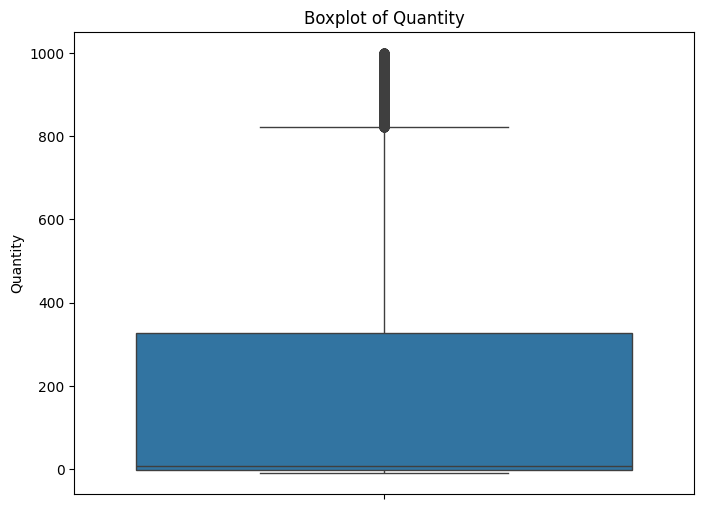

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

Analisis :
   
   > Perbandingan dilakukan untuk melihat jumlah transaksi berdasarkan metode pembayaran (Payment_Method)..

Tujuan :
   
   > Mengidentifikasi wilayah mana yang memberikan kontribusi pendapatan terbesar dan membandingkan performa antar wilayah secara langsung.

Visualisasi :

   > Bar Chart (Grafik Batang).

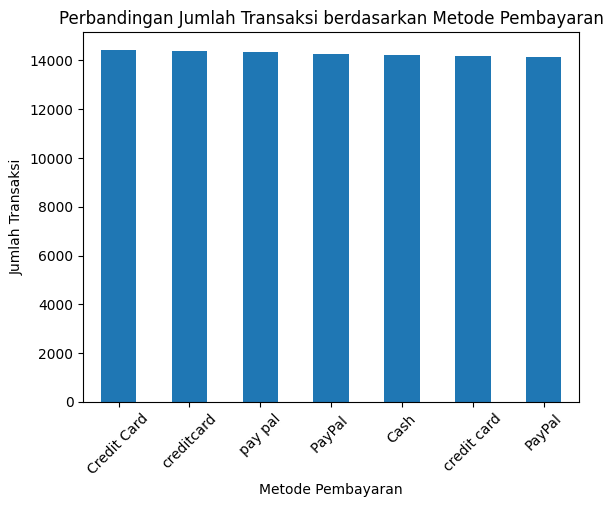

In [11]:
payment_counts = df['Payment_Method'].value_counts()

plt.figure()
payment_counts.plot(kind='bar')
plt.title('Perbandingan Jumlah Transaksi berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

## **Composition/Komposisi**

Analisis :
   
   > Komposisi dilakukan untuk melihat proporsi status transaksi (Transaction_Status) terhadap keseluruhan data transaksi. Dominasi transaksi yang berhasil menunjukkan operasional bisnis berjalan cukup baik. Namun, keberadaan transaksi yang pending dan dibatalkan dalam jumlah besar dapat menjadi indikasi adanya kendala pada proses pembayaran, stok, atau sistem.

Tujuan :
   
   > Visualisasi menunjukkan bahwa status “Completed” mendominasi proporsi transaksi, namun terdapat persentase yang cukup signifikan pada status “Pending” dan “Cancelled”.

Visualisasi :

   > Pie Chart.

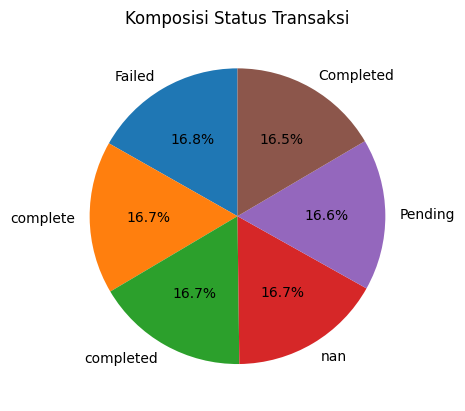

In [17]:
status_counts = df['Transaction_Status'].value_counts(dropna=False)

plt.figure()
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Komposisi Status Transaksi')
plt.ylabel('')
plt.show()

## **Distribution/Distribusi**

Analisis :
   
   > Distribusi dilakukan pada Quantity (jumlah barang yang dibeli) untuk memahami pola pembelian pelanggan.

Insight :
   
   > Distribusi data tidak merata (right-skewed), di mana sebagian besar transaksi memiliki quantity kecil, namun terdapat transaksi dengan jumlah sangat besar. Kondisi ini menyebabkan nilai rata-rata (mean) menjadi jauh lebih besar dibandingkan median. Artinya, sebagian kecil transaksi dengan quantity ekstrem memengaruhi keseluruhan distribusi data. Dari sudut pandang analisis, data ini mengandung outlier yang perlu ditangani agar tidak menghasilkan kesimpulan yang menyesatkan.

Visualisasi :

   > Histogram.

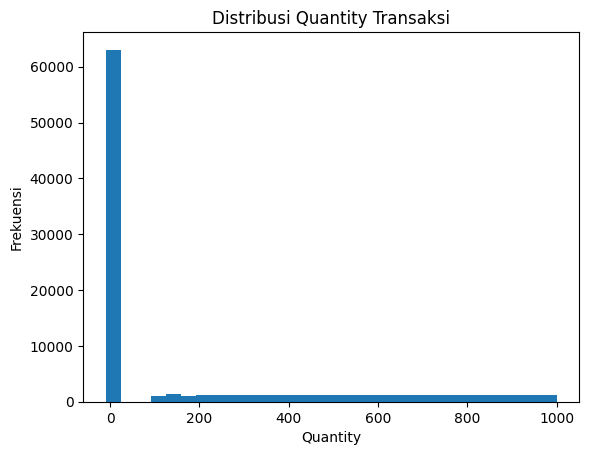

In [18]:
plt.figure()
df['Quantity'].dropna().plot(kind='hist', bins=30)
plt.title('Distribusi Quantity Transaksi')
plt.xlabel('Quantity')
plt.ylabel('Frekuensi')
plt.show()

## **Relationship/Hubungan**

Analisis :
   
   > Analisis hubungan dilakukan antara Quantity dan Price untuk melihat keterkaitan jumlah pembelian dengan nilai transaksi.

Insight :
   
   > Hasil heatmap menunjukkan adanya korelasi positif lemah hingga sedang antara Quantity dan Price, yang berarti peningkatan jumlah barang tidak selalu diikuti oleh peningkatan nilai transaksi secara signifikan. Insight ini mengindikasikan bahwa harga produk bervariasi, sehingga transaksi dengan quantity kecil tetap bisa memiliki nilai transaksi besar jika harga produk tinggi. Sebaliknya, pembelian dalam jumlah besar tidak selalu bernilai tinggi jika harga produk relatif murah. Hubungan ini penting untuk strategi penetapan harga dan analisis perilaku pembelian pelanggan.

Visualisasi :

   > Heatmap.

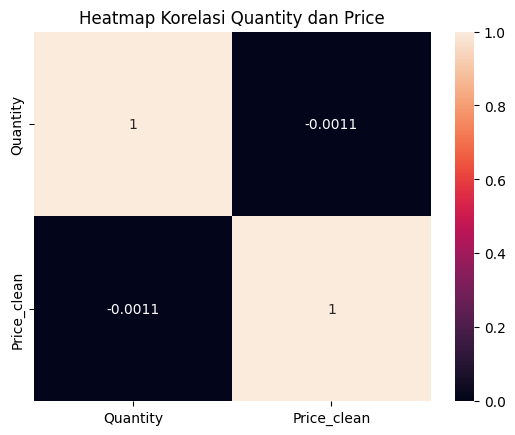

In [19]:
# Membersihkan kolom Price agar numerik
df['Price_clean'] = (
    df['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')

# Korelasi
corr_data = df[['Quantity', 'Price_clean']].corr()

plt.figure()
sns.heatmap(corr_data, annot=True)
plt.title('Heatmap Korelasi Quantity dan Price')
plt.show()

# **Menyimpan Dataset**

In [24]:
df.to_csv('[Bersih]GlobalSuperStore2016.csv', index=False)